# Import libraries and read the dataset.
<b><n> 1 Explore Data Analysis. Find out how one variable related to other and distributions of data.
State your insights.</b></n>

<b>2 Build a linear regression model to predict the house prices</b></n>

<b>3 Try to find out important features or create new features to improve the performance for your model.</b></n>

<b>4 Use appropriate cross validations techniques to find out the best predictor parameters and best prediction.</b></n></n>

<b>PS - You can change the order of steps or add additional steps to figure out the best solution.</b>

 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [3]:
# Import all the necessary libraries....

from sklearn import model_selection
from sklearn import metrics
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [4]:
house_df=pd.read_csv("kc_house_data.csv")


In [5]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [6]:
house_df.shape

(21613, 21)

In [7]:
house_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
house_df['date']= pd.to_datetime(house_df['date'])#, format='%Y%m%dT%H%M%S')

In [9]:
house_df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [10]:
house_df.duplicated().sum()

0


We checked for any duplicate rows and the dataset does not have any duplicates

In [11]:
house_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.00,4580301520.86,2876565571.31,1000102.00,2123049194.00,3904930410.00,7308900445.00,9900000190.00
price,21613.00,540088.14,367127.20,75000.00,321950.00,450000.00,645000.00,7700000.00
bedrooms,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21613.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21613.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


In [12]:
y=house_df['price']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AE698DF2E8>,
      dtype=object)

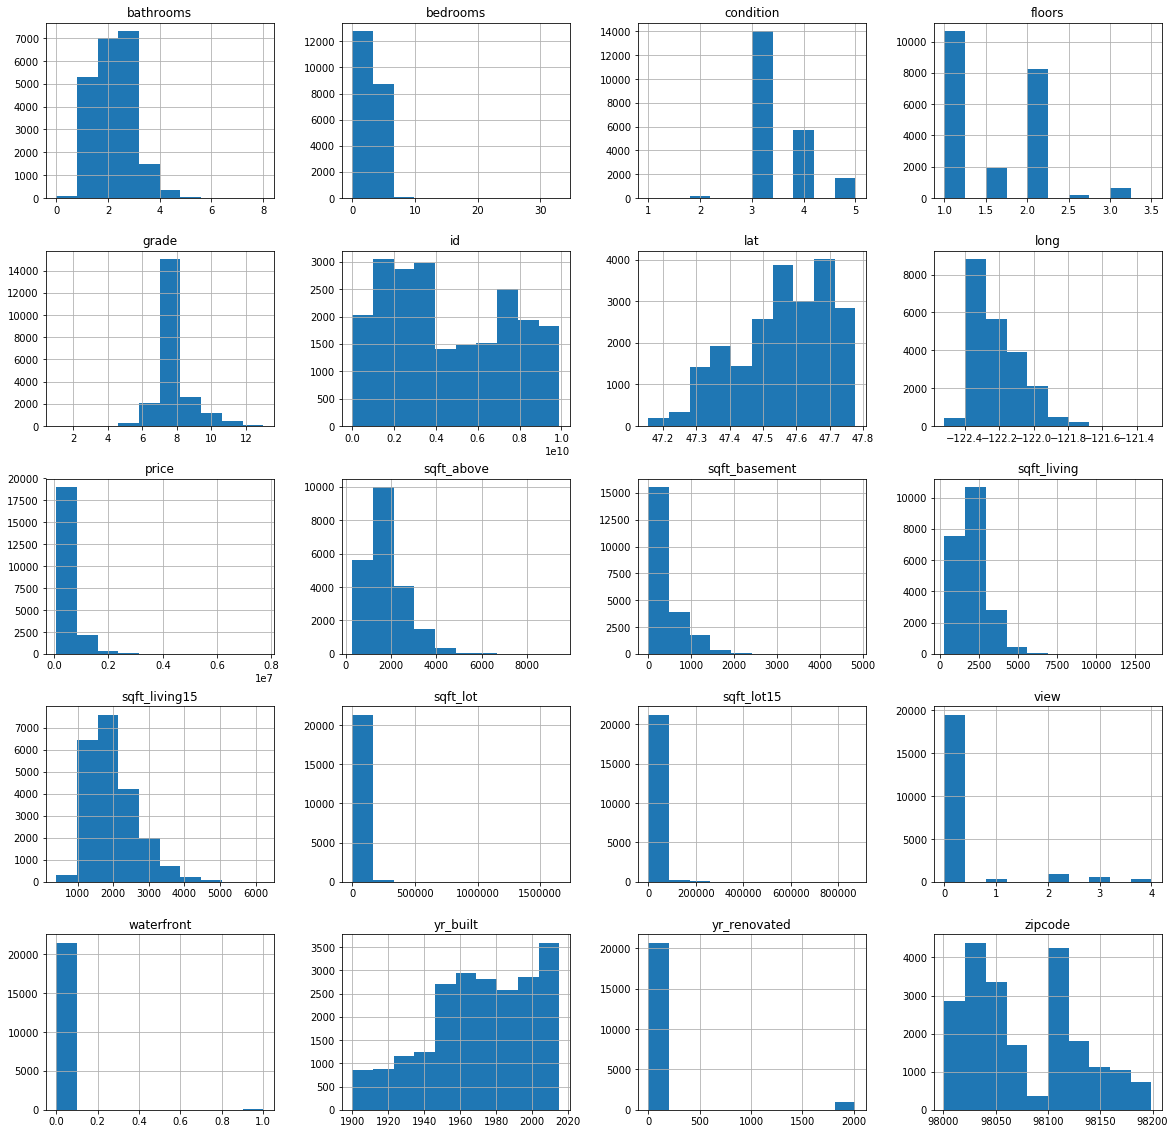

In [13]:
house_df.hist(figsize = [20,20])   # Generate historgrams of all the dimensions


In [14]:
#sns.pairplot(data=house_df_dateless,hue="price")

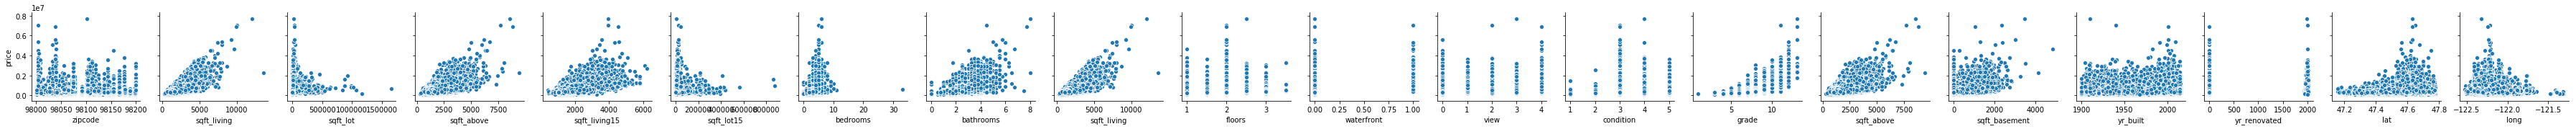

In [15]:
sns.pairplot(data=house_df, x_vars=['zipcode','sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15','bedrooms', 'bathrooms', 'sqft_living',
        'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long'], y_vars=["price"])


In [16]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

bedrooms            AxesSubplot(0.125,0.749828;0.133621x0.130172)
bathrooms        AxesSubplot(0.285345,0.749828;0.133621x0.130172)
sqft_living       AxesSubplot(0.44569,0.749828;0.133621x0.130172)
sqft_lot         AxesSubplot(0.606034,0.749828;0.133621x0.130172)
floors           AxesSubplot(0.766379,0.749828;0.133621x0.130172)
waterfront          AxesSubplot(0.125,0.593621;0.133621x0.130172)
view             AxesSubplot(0.285345,0.593621;0.133621x0.130172)
condition         AxesSubplot(0.44569,0.593621;0.133621x0.130172)
grade            AxesSubplot(0.606034,0.593621;0.133621x0.130172)
sqft_above       AxesSubplot(0.766379,0.593621;0.133621x0.130172)
sqft_basement       AxesSubplot(0.125,0.437414;0.133621x0.130172)
yr_built         AxesSubplot(0.285345,0.437414;0.133621x0.130172)
yr_renovated     AxesSubplot(0.606034,0.437414;0.133621x0.130172)
zipcode          AxesSubplot(0.766379,0.437414;0.133621x0.130172)
lat                 AxesSubplot(0.125,0.281207;0.133621x0.130172)
long      

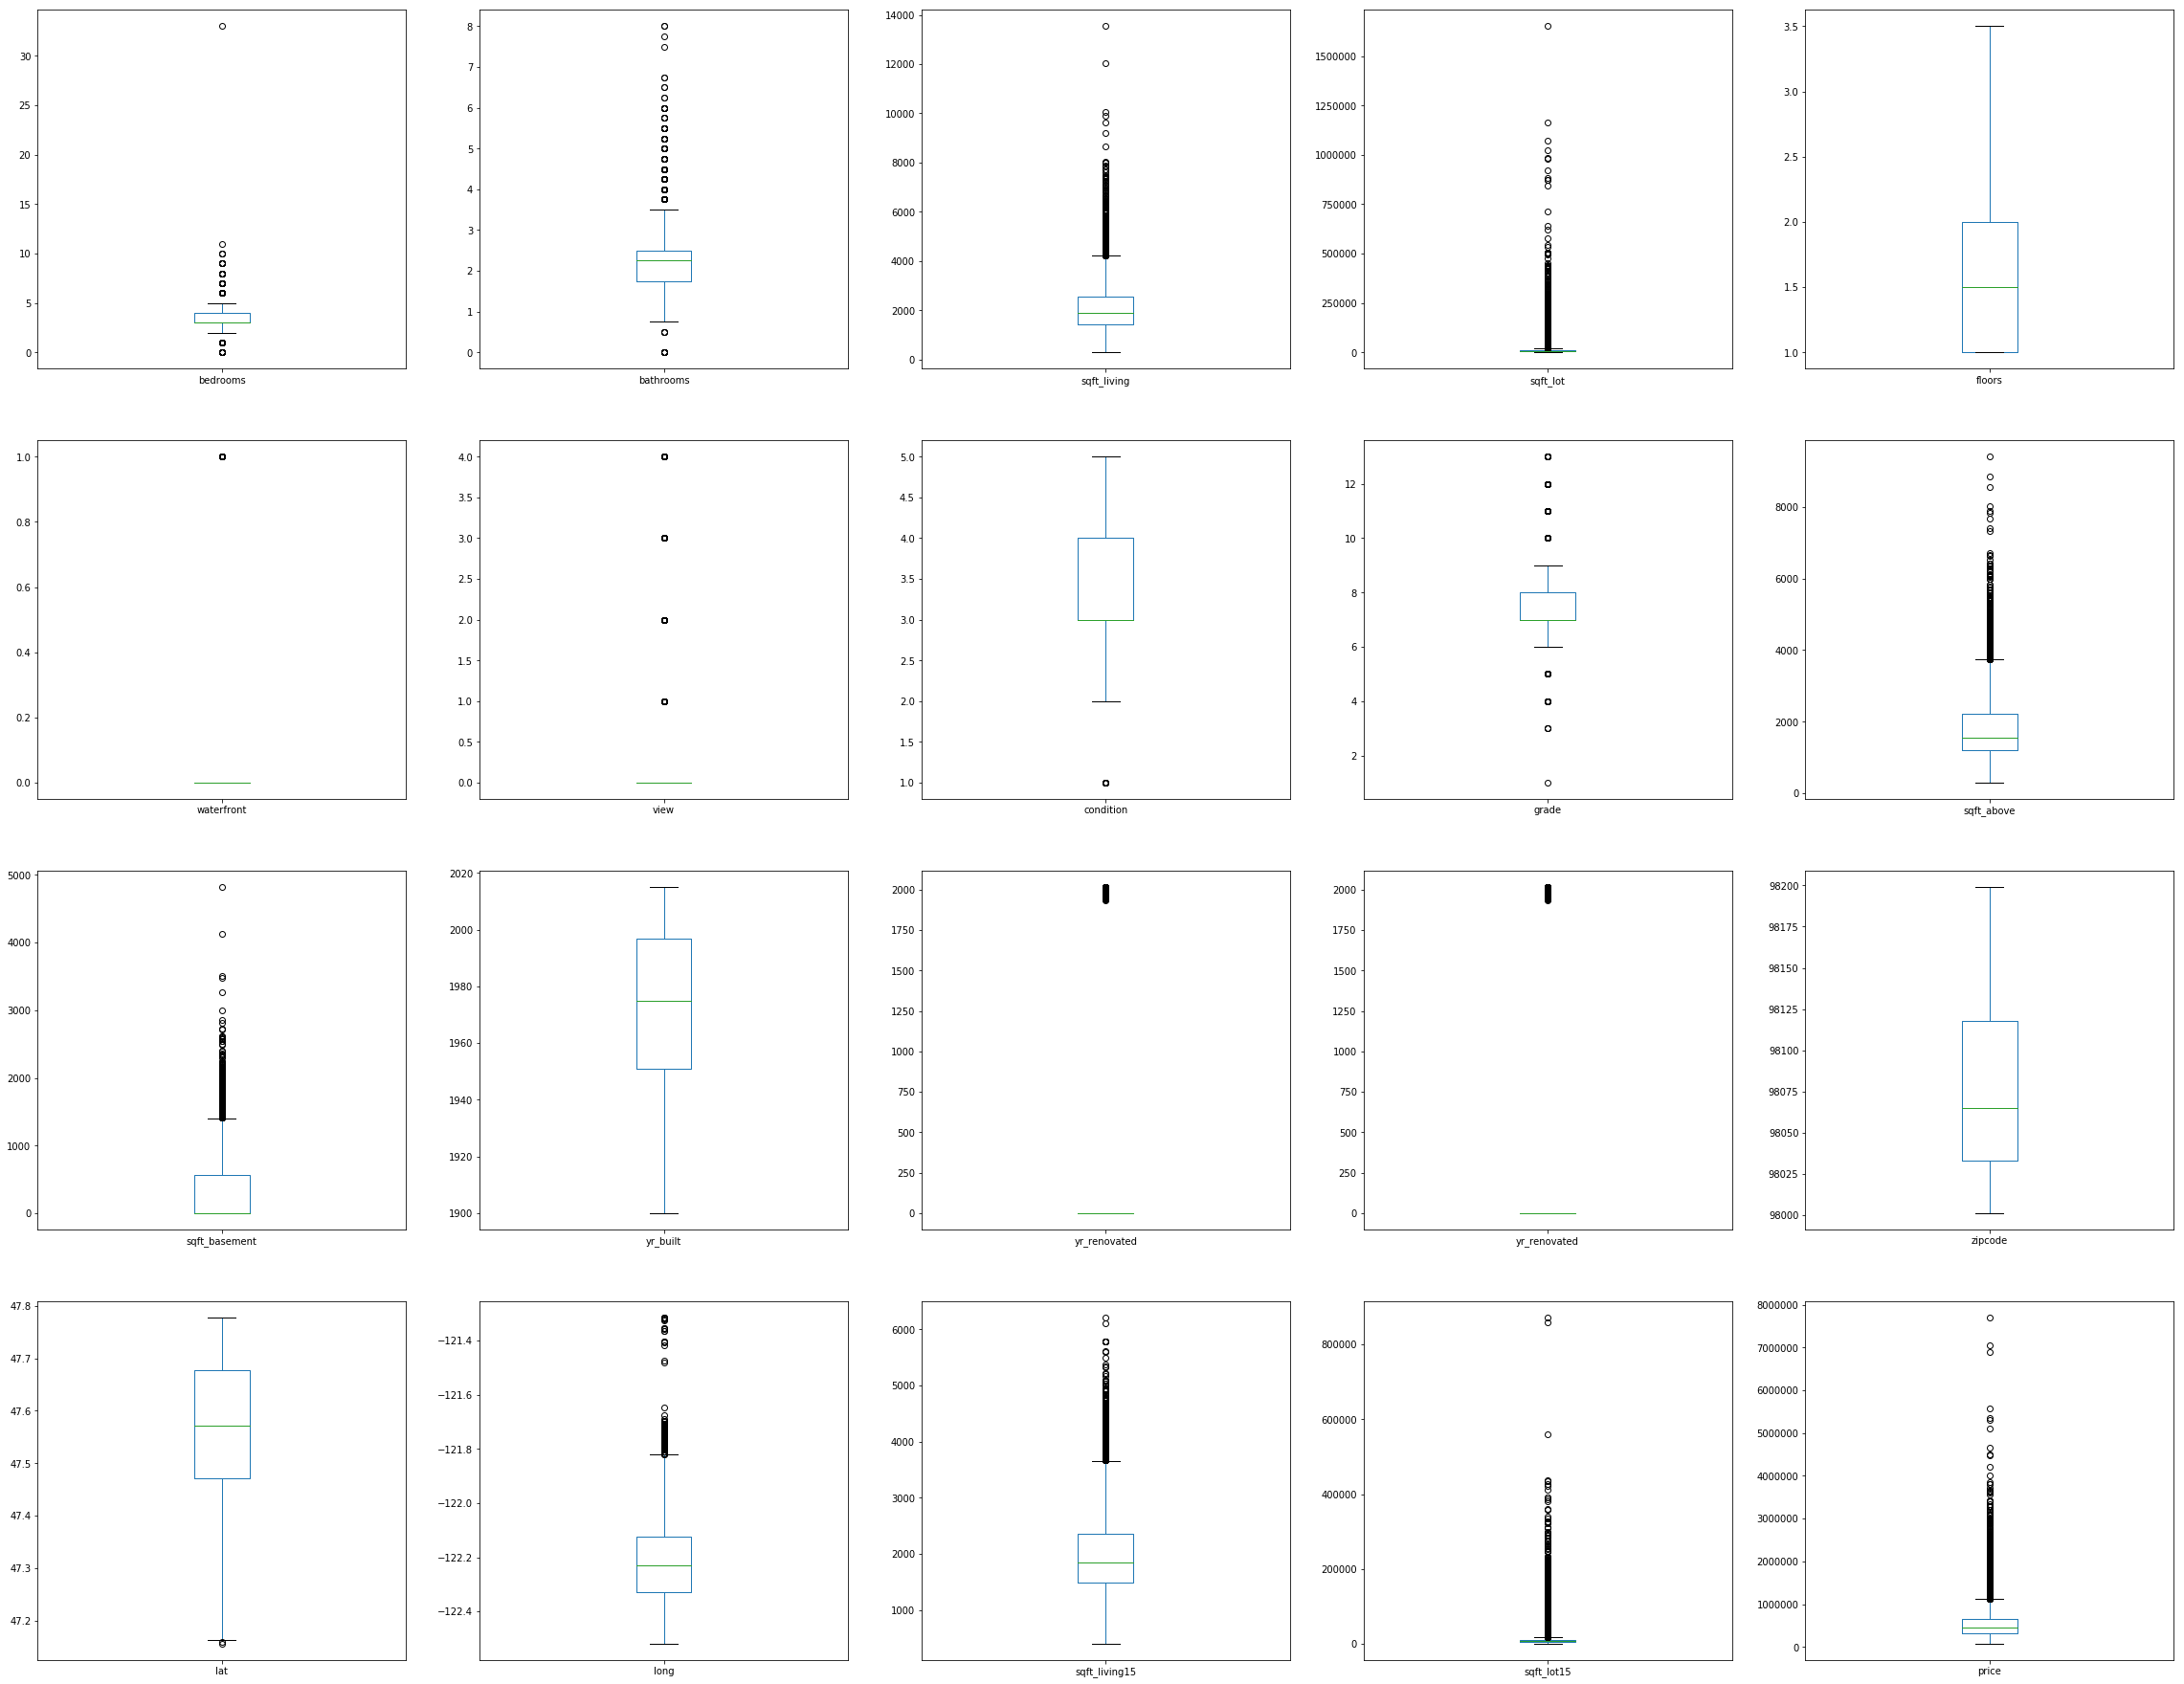

In [17]:
house_df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'yr_renovated', 'zipcode',
       'lat', 'long','sqft_living15', 'sqft_lot15', 'price']].plot(kind="box",subplots=True,layout=(5,5),figsize=(40,40))

We can see there are some outliers but we will not remove them in this step

In [18]:
house_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


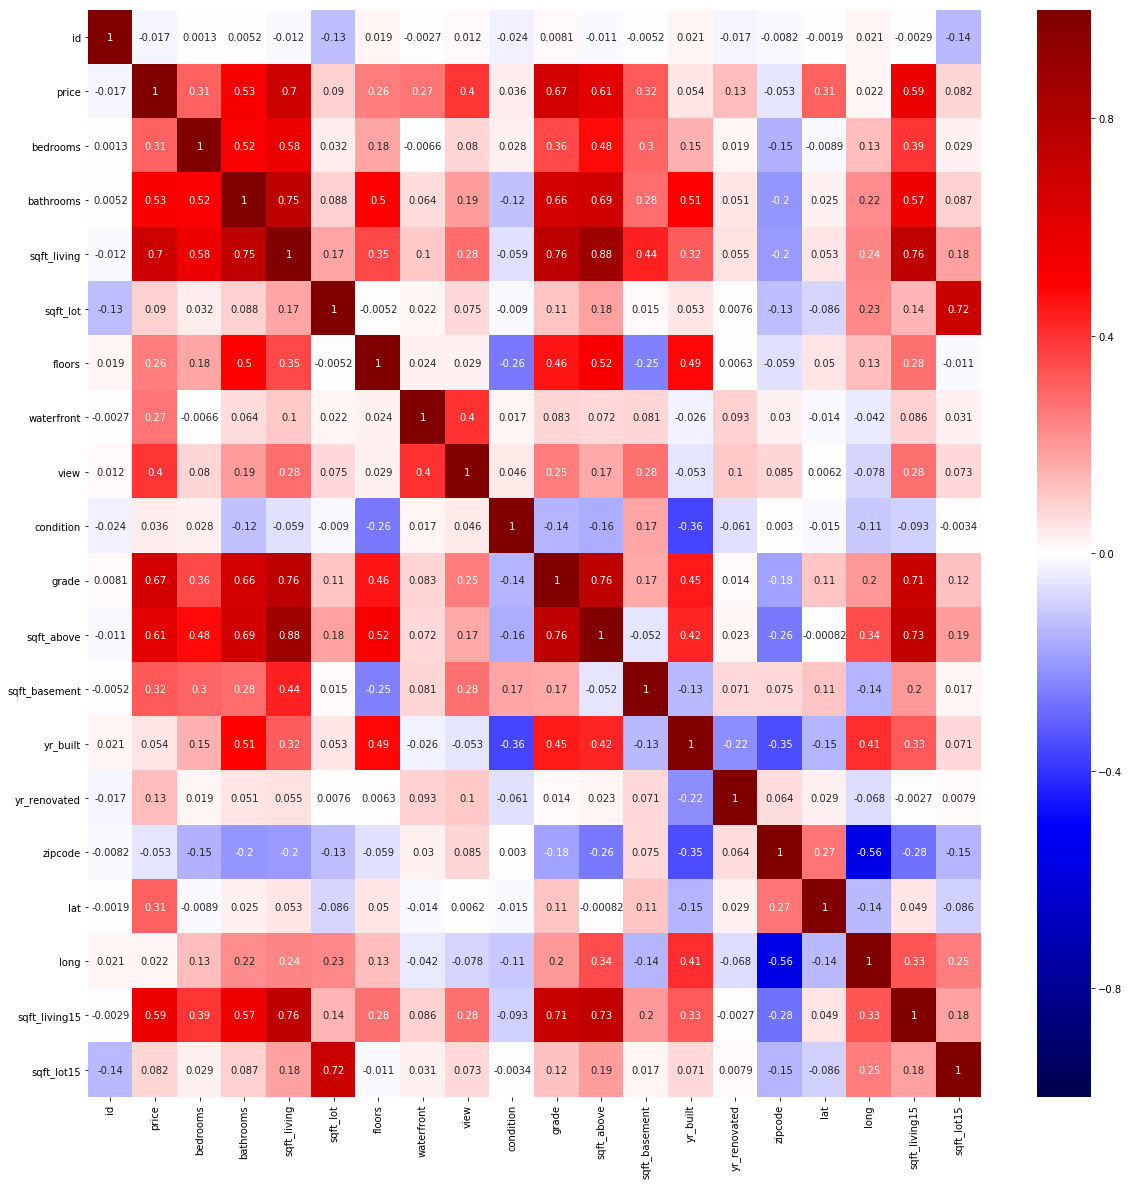

In [19]:
import seaborn as sns
plt.subplots(figsize=(20,20))
sns.heatmap(house_df.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

In [20]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

1) ID variable does not have any significance for price estimation so we can drop that variable

2) Price and sqft_living15 have a strong prositive correlation so we will have to retain the same

3) Price and long do not have a significant +ve correlation and so we can drop long

4) Price does not have a significant +ve or -ve correlation with yr_renovated,sqft_lot15, zipcode, yr_built, condition, sqft_lot and so we can drop these variables

# Let us First Apply Liner Regression and see the Accuracy Score for the existing Variables

In [21]:
house_df=house_df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15','price']]

# Let us Scale the Data Using the Zscore

In [22]:
from scipy.stats import zscore
house_df_z = house_df.apply(zscore)

In [23]:
house_df_z.isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [24]:
X= house_df_z[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y=house_df_z['price']

# Splitting the Scaled Data into Test and Train

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()


In [27]:
print("Test set : ", X_test.shape)
print("Training set : ", X_train.shape)
print("We can see the X_test and the X_training sent are split in 70:30 ratio")

Test set :  (6484, 18)
Training set :  (15129, 18)
We can see the X_test and the X_training sent are split in 70:30 ratio


In [28]:
print("Test set : ", y_test.shape)
print("Training set : ", y_train.shape)
print("We can see the y_test and the y_training sent are split in 70:30 ratio")

Test set :  (6484,)
Training set :  (15129,)
We can see the y_test and the y_training sent are split in 70:30 ratio


In [29]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
y_pred=regressor.predict(X_test).reshape(-1,1)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
from sklearn import metrics
print(regressor.score(X_test,y_test))

0.6993536332590762


# Directly applying Liner Regression gives us an accuracy of approximately 70%, 

# Lets Treat the outliers and see if we are able to improve the model

In [33]:
house_df_new=house_df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement',
       'lat', 'sqft_living15', 'sqft_lot15','zipcode', 'price']]

In [34]:
import warnings
warnings.filterwarnings('ignore')
maxbedroom = house_df_new['bedrooms'].quantile(0.75) + 1.5*(house_df_new['bedrooms'].quantile(0.75) - house_df_new['bedrooms'].quantile(0.25))
maxbath= house_df_new['bathrooms'].quantile(0.75) + 1.5*(house_df_new['bathrooms'].quantile(0.75) - house_df_new['bathrooms'].quantile(0.25))
maxsqft_living= house_df_new['sqft_living'].quantile(0.75) + 1.5*(house_df_new['sqft_living'].quantile(0.75) - house_df_new['sqft_living'].quantile(0.25))
maxsqft_lot= house_df_new['sqft_lot'].quantile(0.75) + 1.5*(house_df_new['sqft_lot'].quantile(0.75) - house_df_new['sqft_lot'].quantile(0.25))
maxfloors= house_df_new['floors'].quantile(0.75) + 1.5*(house_df_new['floors'].quantile(0.75) - house_df_new['floors'].quantile(0.25))
maxsqft_above= house_df_new['sqft_above'].quantile(0.75) + 1.5*(house_df_new['sqft_above'].quantile(0.75) - house_df_new['sqft_above'].quantile(0.25))
maxsqft_living15= house_df_new['sqft_living15'].quantile(0.75) + 1.5*(house_df_new['sqft_living15'].quantile(0.75) - house_df_new['sqft_living15'].quantile(0.25))
maxsqft_lot15= house_df_new['sqft_lot15'].quantile(0.75) + 1.5*(house_df_new['sqft_lot15'].quantile(0.75) - house_df_new['sqft_lot15'].quantile(0.25))
maxbase= house_df_new['sqft_basement'].quantile(0.75) + 1.5*(house_df_new['sqft_basement'].quantile(0.75) - house_df_new['sqft_basement'].quantile(0.25))
maxsqft_lot15= house_df_new['sqft_lot15'].quantile(0.75) + 1.5*(house_df_new['sqft_lot15'].quantile(0.75) - house_df_new['sqft_lot15'].quantile(0.25))


In [35]:
house_df_new['bedrooms']=house_df_new['bedrooms'].map(lambda x: maxbedroom if x>maxbedroom 
     else x)
house_df_new['bathrooms']=house_df_new['bathrooms'].map(lambda x: maxbath if x>maxbath 
     else x)
house_df_new['sqft_living']=house_df_new['sqft_living'].map(lambda x: maxsqft_living if x>maxsqft_living 
     else x)
house_df_new['sqft_lot']=house_df_new['sqft_lot'].map(lambda x: maxsqft_lot if x>maxsqft_lot 
     else x)
house_df_new['floors']=house_df_new['floors'].map(lambda x: maxfloors if x>maxfloors 
     else x)
house_df_new['sqft_above']=house_df_new['sqft_above'].map(lambda x: maxsqft_above if x>maxsqft_above 
     else x)
house_df_new['sqft_living15']=house_df_new['sqft_living15'].map(lambda x: maxsqft_living15 if x>maxsqft_living15 
     else x)
house_df_new['sqft_lot15']=house_df_new['sqft_lot15'].map(lambda x: maxsqft_lot15 if x>maxsqft_lot15 
     else x)
house_df_new['sqft_basement']=house_df_new['sqft_basement'].map(lambda x: maxbase if x>maxbase 
     else x)

bedrooms            AxesSubplot(0.125,0.749828;0.133621x0.130172)
bathrooms        AxesSubplot(0.285345,0.749828;0.133621x0.130172)
sqft_living       AxesSubplot(0.44569,0.749828;0.133621x0.130172)
sqft_lot         AxesSubplot(0.606034,0.749828;0.133621x0.130172)
floors           AxesSubplot(0.766379,0.749828;0.133621x0.130172)
waterfront          AxesSubplot(0.125,0.593621;0.133621x0.130172)
view             AxesSubplot(0.285345,0.593621;0.133621x0.130172)
grade             AxesSubplot(0.44569,0.593621;0.133621x0.130172)
sqft_above       AxesSubplot(0.606034,0.593621;0.133621x0.130172)
sqft_basement    AxesSubplot(0.766379,0.593621;0.133621x0.130172)
lat                 AxesSubplot(0.125,0.437414;0.133621x0.130172)
sqft_living15    AxesSubplot(0.285345,0.437414;0.133621x0.130172)
sqft_lot15        AxesSubplot(0.44569,0.437414;0.133621x0.130172)
price            AxesSubplot(0.606034,0.437414;0.133621x0.130172)
dtype: object

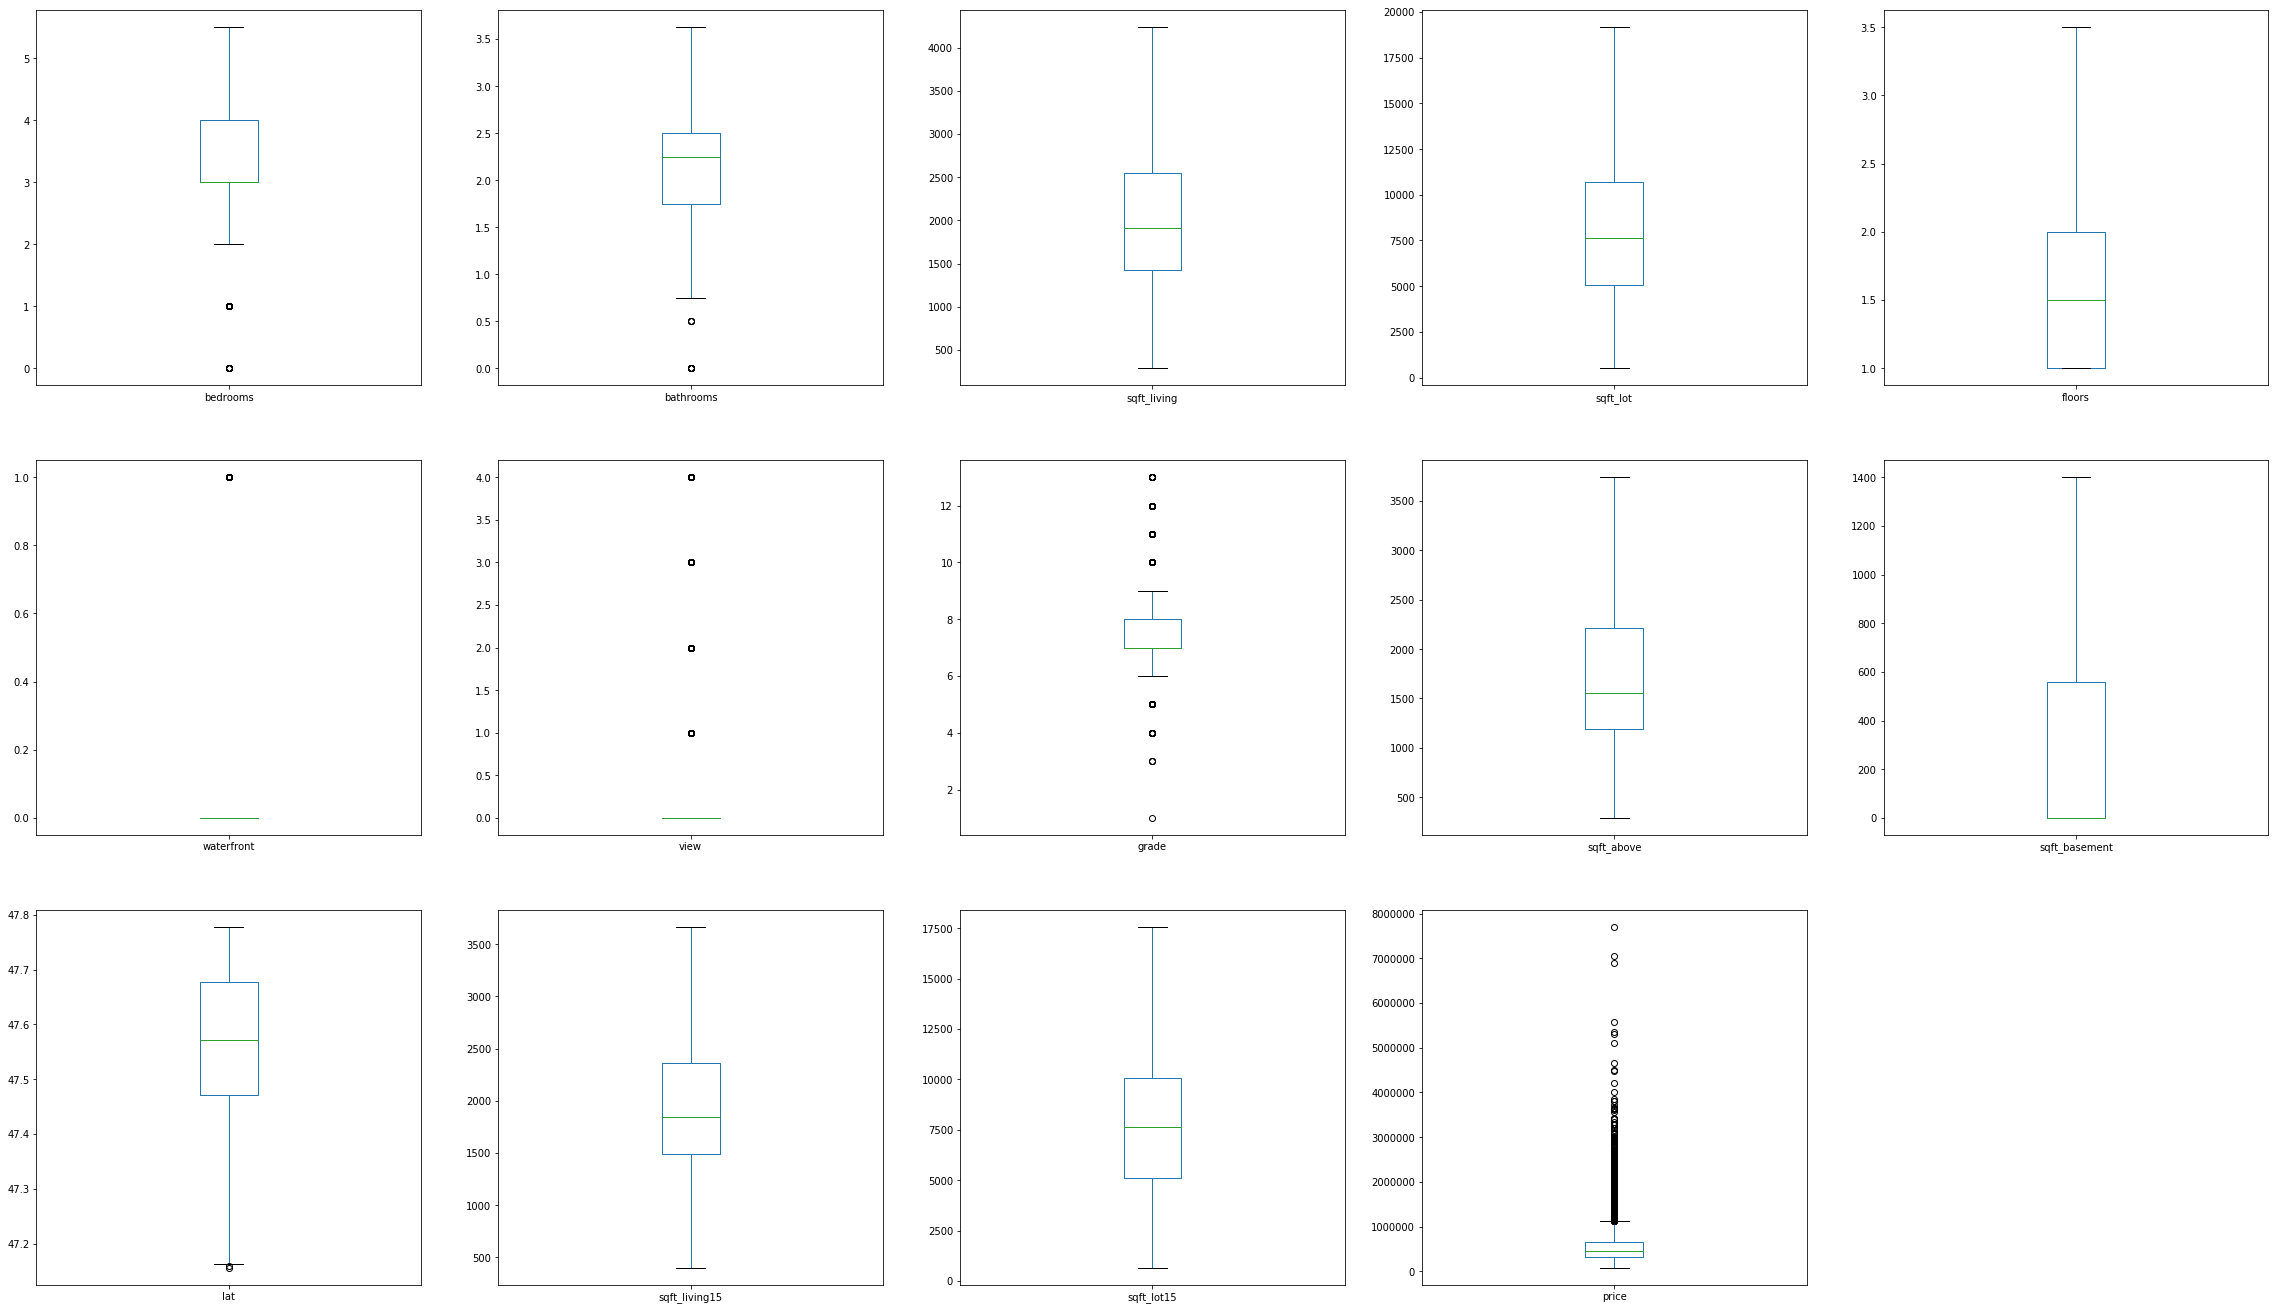

In [36]:
house_df_new[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement',
       'lat', 'sqft_living15', 'sqft_lot15', 'price']].plot(kind="box",subplots=True,layout=(5,5),figsize=(40,40))

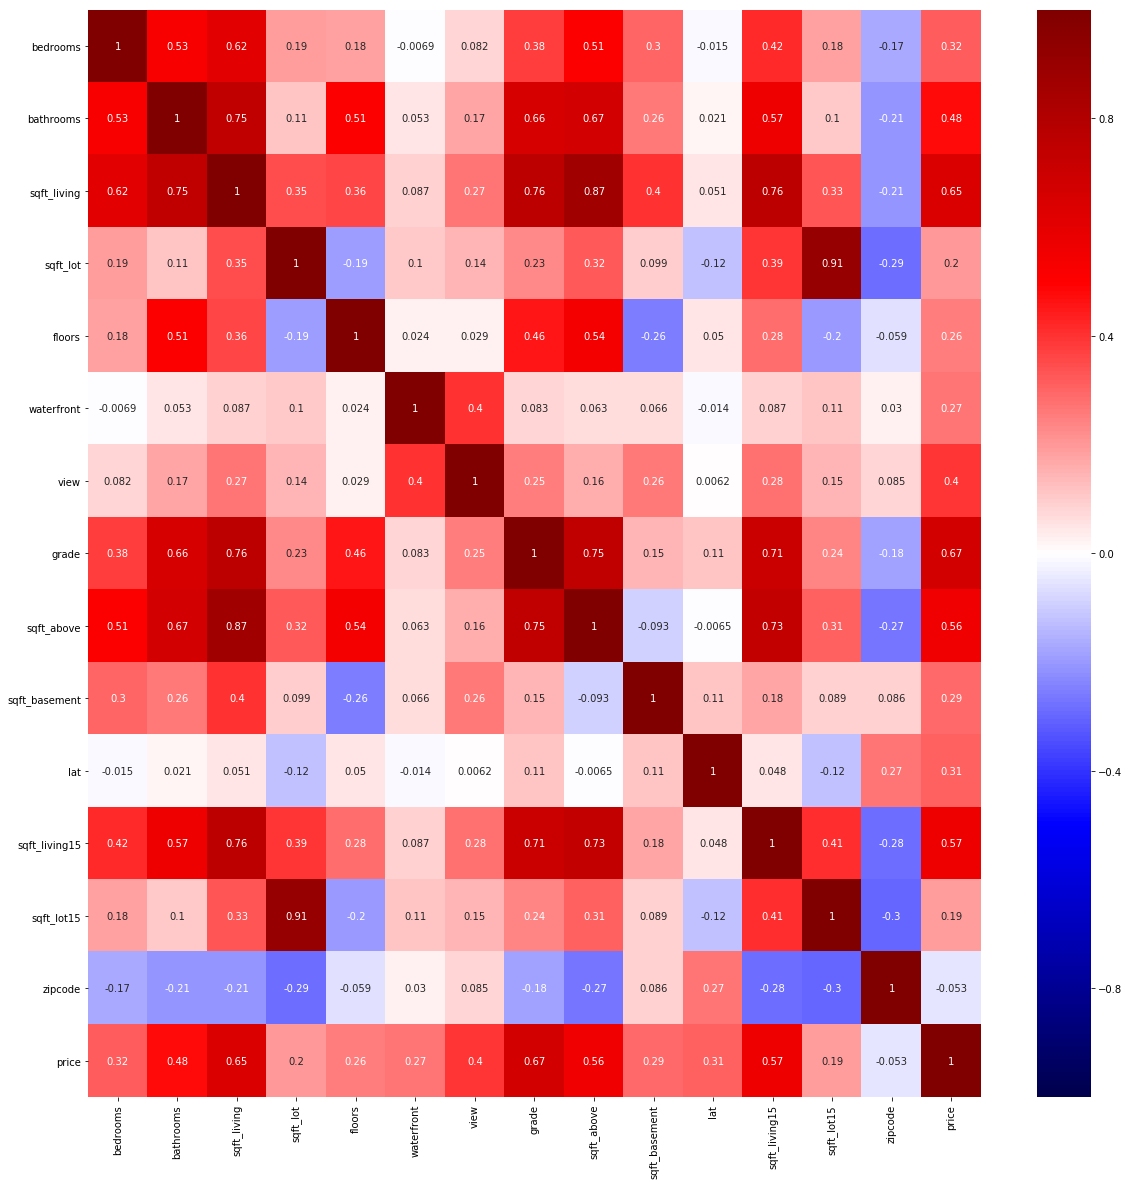

In [37]:
import seaborn as sns
plt.subplots(figsize=(20,20))
sns.heatmap(house_df_new.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

Keeping Variables which have a high correlation with Price lets build a model

In [38]:
from scipy.stats import zscore
house_df_new_z = house_df_new.apply(zscore)

In [39]:
X= house_df_new_z[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement',
       'lat', 'sqft_living15', 'sqft_lot15','zipcode']]
y=house_df_new_z['price']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test).reshape(-1,1)

In [41]:
print(regressor.score(X_test,y_test))

0.6335355914013004


# As we can see the Accuracy score has reduced when we tried to treat the outlier so instead we will try Kfold Cross validation to see if we can improve the prediction

# K Fold Cross Validation

In [42]:
X= house_df_z[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y=house_df_z['price']

In [43]:
from sklearn.model_selection import KFold, cross_val_score

In [44]:
kfold = model_selection.KFold(n_splits=150)# Means Model will be split into 20 data sets i.e K folds 

In [45]:
model = LinearRegression()

In [46]:
results = model_selection.cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kfold)#specify scoring mentod
print("Mean Square Error: %.2f (%.2f)" % (-results.mean(), results.std()))# STD means how far away the results are from the mean

Mean Square Error: 0.30 (0.18)


# Features selection

In [47]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [49]:
print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

Training dataset shape: (15129, 18) (15129,)
Testing dataset shape: (6484, 18) (6484,)


In [50]:
linR = LinearRegression()

In [51]:
sfs1 = sfs(linR, k_features=10, forward=True, scoring='r2', cv=10, floating=True) #forward=True Forward selection, 

In [52]:
sfs1 = sfs1.fit(x_train.values, y_train.values)

In [53]:
sfs1.get_metric_dict()

{1: {'feature_idx': (2,),
  'cv_scores': array([0.52016304, 0.47690408, 0.50711162, 0.47481202, 0.51034606,
         0.51101785, 0.47555242, 0.50920787, 0.4850285 , 0.45981315]),
  'avg_score': 0.49299566074538725,
  'feature_names': ('2',),
  'ci_bound': 0.014638046489764321,
  'std_dev': 0.01970888817389734,
  'std_err': 0.006569629391299112},
 2: {'feature_idx': (2, 14),
  'cv_scores': array([0.57267713, 0.55324152, 0.57169368, 0.55100689, 0.59947757,
         0.57302329, 0.55025743, 0.59122152, 0.57767607, 0.54112351]),
  'avg_score': 0.5681398602420357,
  'feature_names': ('2', '14'),
  'ci_bound': 0.013344016505083696,
  'std_dev': 0.017966586543719146,
  'std_err': 0.005988862181239714},
 3: {'feature_idx': (2, 6, 14),
  'cv_scores': array([0.60324171, 0.60967198, 0.61086603, 0.61118376, 0.64126867,
         0.60939498, 0.59416571, 0.64916493, 0.60469949, 0.59423532]),
  'avg_score': 0.6127892564400204,
  'feature_names': ('2', '6', '14'),
  'ci_bound': 0.012884446026618597,
  '

In [54]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

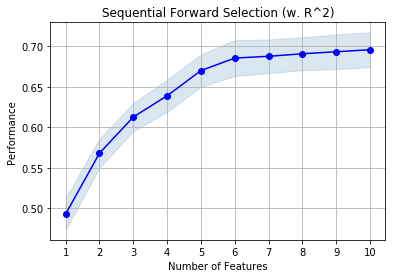

In [55]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [56]:
# Which features?
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 5, 6, 8, 11, 13, 14, 15]


In [57]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'yr_built', 'zipcode', 'lat', 'long']


# Build full model with selected features

In [58]:
linR = LinearRegression()
linR.fit(x_train[subsetColumnList], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
y_train_pred = linR.predict(x_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % linR.score(x_train[subsetColumnList], y_train))

Training accuracy on selected features: 0.696


In [60]:
y_test_pred = linR.predict(x_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % linR.score(x_test[subsetColumnList], y_test))

Testing accuracy on selected features: 0.695


# We can see with the Kfold Cross Validation we are able to get an accuracy of 70% this model which is not an improvement over the direct Liner Regression Model application.
Inorder to improve this we will have to create seperate models for different types of houses

# Just for Quick reference lets Build full model on ALL features, for comparison

In [61]:
linR = LinearRegression()
linR.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
y_train_pred = linR.predict(x_train)
print('Training accuracy on all features: %.3f' % linR.score(x_train, y_train))

Training accuracy on all features: 0.699


In [63]:
y_test_pred = linR.predict(x_test)
print('Testing accuracy on all features: %.3f' % linR.score(x_test, y_test))

Testing accuracy on all features: 0.699


# Creating a regularized RIDGE model and Lasso Model

In [64]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score


In [65]:
X=house_df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [66]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

In [67]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=2158)

In [68]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
ridge = Ridge(alpha=.3) # Lambda  Change the alpha value from 0.3 to 0.5
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [-0.09016365  0.08027357  0.22341227  0.02088171  0.00601651  0.13914738
  0.11360603  0.04704362  0.30554898  0.21223022  0.06653118 -0.20713256
  0.02895496 -0.09011559  0.23264142 -0.08552405  0.0398748  -0.03218882]


In [70]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [-0.          0.          0.38302515  0.          0.          0.07601837
  0.09535212  0.          0.24848299  0.          0.         -0.05086427
  0.         -0.          0.15337746 -0.          0.         -0.        ]


In [71]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))


0.7013020374233985
0.6955112475873442


In [72]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7012965386998862
0.6954865880046714


In [73]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.6375808756987014
0.6391785470645899


# Accuracy Score for Simple Liner Regression Model is Better than Ridge and Lasso Regression

# Applying Log transform to improve the model

In [90]:
house_df_t=house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [91]:
house_df_t[['price','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat', 'sqft_living15', 'sqft_lot15']]=np.log(house_df[['price','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat', 'sqft_living15', 'sqft_lot15']]+1)

In [92]:
X= house_df_t[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y=house_df_t['price']

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [94]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()


In [95]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [96]:
y_pred=regressor.predict(X_test)

In [101]:
from sklearn import metrics
print(regressor.score(X_test,y_test))

0.7737604294036317


In [105]:
from sklearn.metrics import mean_squared_error,r2_score
print('R2 for Test Dataset',metrics.r2_score(y_test,y_pred))

R2 for Test Dataset 0.7737604294036317


# Liner Regression after a Log Transfrom Increases the accuracy to  77%

In [102]:
y_pred_anti_log=np.exp(y_pred)

In [103]:
y_test_anti_log=np.exp(y_test)

In [104]:
from sklearn.metrics import r2_score
print(r2_score(y_test_anti_log,y_pred_anti_log))

0.7461693126380413
